In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

importing the dataset into the dataframe

In [5]:
data = pd.read_csv(r"C:\Users\G.Sreenivasulu\ABHI\loan_approval_project\dataset\02_KPI_dataset.csv")

EDA

1.TARGET VARIABLE ANALYSIS

In [6]:
#PERCENTAGE OF THE TARGET VARIABLE
print(data['loan_status'].value_counts(normalize=True)*100)

loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


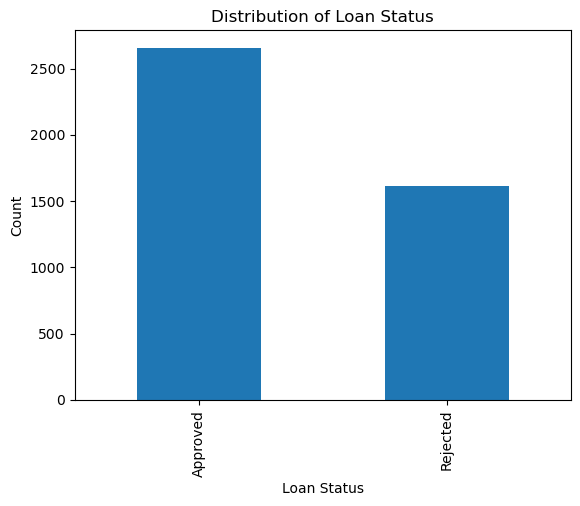

In [7]:
data['loan_status'].value_counts().plot(kind='bar')
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

From the above bar chart, approved loans > Rejected loans and the data is moderately balanced

2. CIBIL score analysis

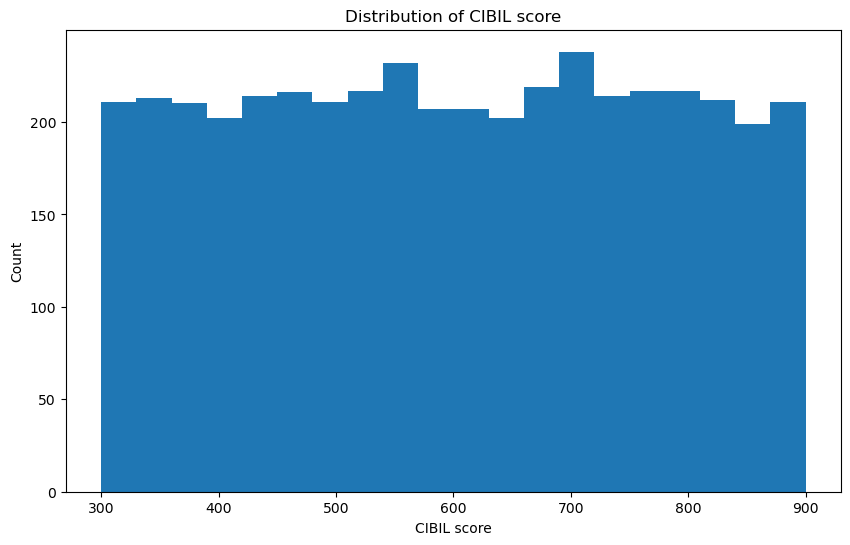

In [8]:
#histogram
plt.figure(figsize=(10,6))
plt.hist(data['cibil_score'],bins=20)
plt.title("Distribution of CIBIL score")
plt.xlabel("CIBIL score")
plt.ylabel("Count")
plt.show()

The CIBIL scores are distributed evenly without any dominant peaks. This tells us that there is no bias in the data. 

<Figure size 1000x600 with 0 Axes>

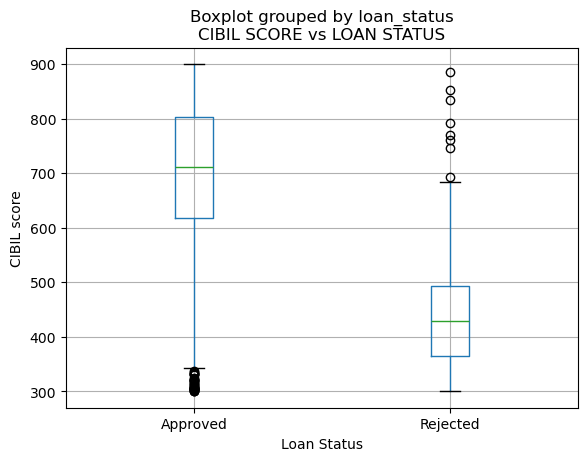

In [9]:
#boxplot
plt.figure(figsize=(10,6))
data.boxplot(column ='cibil_score',by='loan_status')
plt.title("CIBIL SCORE vs LOAN STATUS")
plt.ylabel("CIBIL score")
plt.xlabel("Loan Status")
plt.show()

In the above boxplot, we can see that there is no overlap between the boxes. There is a good gap between Q3[75% rejected loans] and Q1[25% of approved loans]. This makes CIBIL score a really strong predictor as there is a clear gap between the approved and rejected loans. This also justifies the credit score kpi calculated earlier.

3. INCOME analysis

<Figure size 1000x600 with 0 Axes>

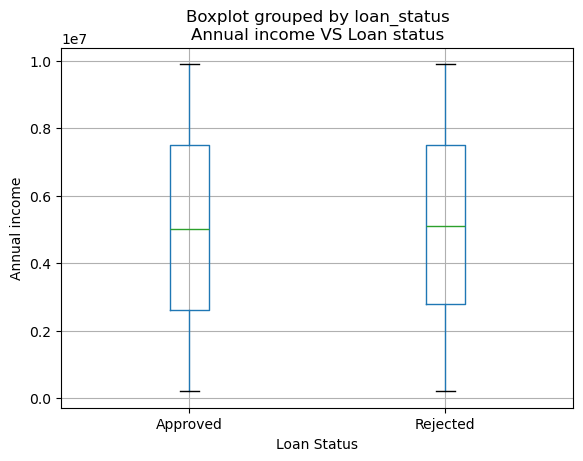

In [10]:
#box plot
plt.figure(figsize=(10,6))
data.boxplot(column ="income_annum", by="loan_status")
plt.xlabel("Loan Status")
plt.ylabel("Annual income")
plt.title("Annual income VS Loan status")
plt.show()

In the above box plot, the boxes are overlapping. Consider income of (0.6 * 1e7), one of them is accepted and the other is rejected. This shows that annual income doesn't strongly influence the loan status

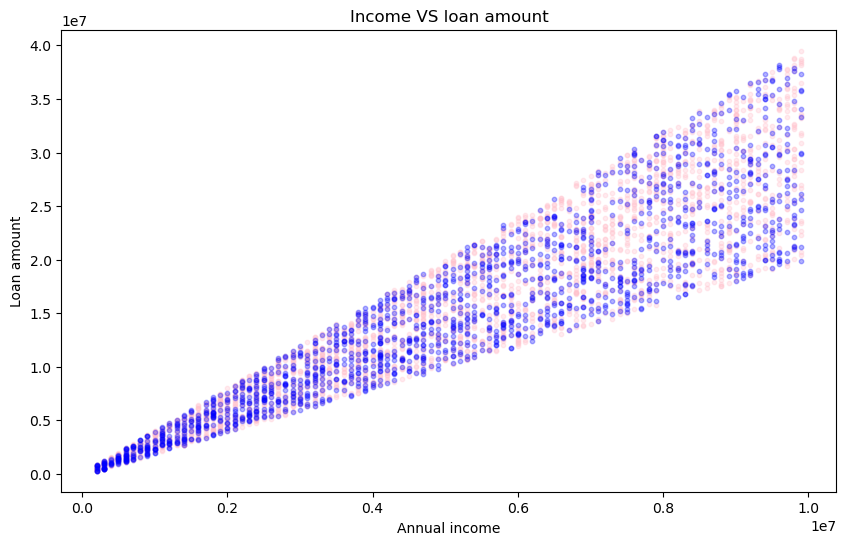

In [11]:
#scatter plot
approved = data[data['loan_status'] == "Approved"]
rejected = data[data['loan_status'] == "Rejected"]

plt.figure(figsize=(10,6))
plt.scatter(approved['income_annum'],approved['loan_amount'],alpha=0.3,color="Pink",s=10,label ="Approved")
plt.scatter(rejected['income_annum'],rejected['loan_amount'],alpha=0.3,color="blue",s=10,label="Rejected")

plt.xlabel("Annual income")
plt.ylabel("Loan amount")
plt.title("Income VS loan amount")
plt.show()

The above scatter plot shows that the applicants with higher income tend to take bigger loans. But for a particular income, there is both rejections and approvals. So, this shows that just income is not effecient to give a loan


4.TOTAL ASSETS

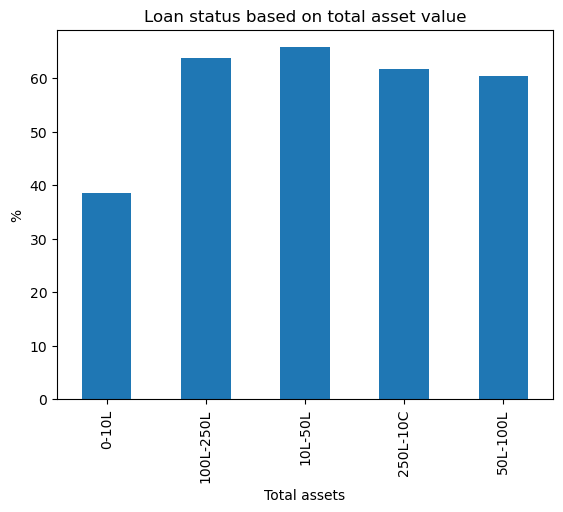

In [12]:
asset_approval = data.groupby('asset_bucket')['loan_status'].apply(lambda x: (x=="Approved") .mean()) *100
asset_approval.plot(kind="bar")
plt.xlabel("Total assets")
plt.ylabel("%")
plt.title("Loan status based on total asset value")
plt.show()

Very low assets have a lower loan approval percentage, but it stays steady with little change after 10L. This shows that the total asset value has little impact on the loan status

SUPPORTING FACTORS

1. Employment

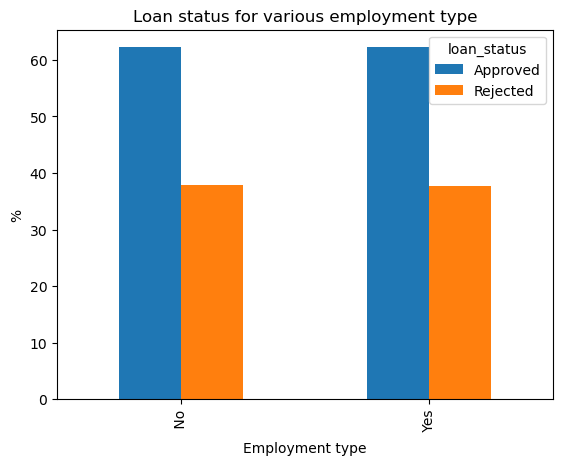

In [13]:
rate = data.groupby('self_employed')['loan_status'].value_counts(normalize=True).unstack() *100
rate.plot(kind="bar")
plt.xlabel("Employment type")
plt.ylabel("%")
plt.title("Loan status for various employment type")
plt.show()

From the above plot, we can say that the type of employment doesn't really affect the loan status because both of them have similar approval and rejection rates

2.Education

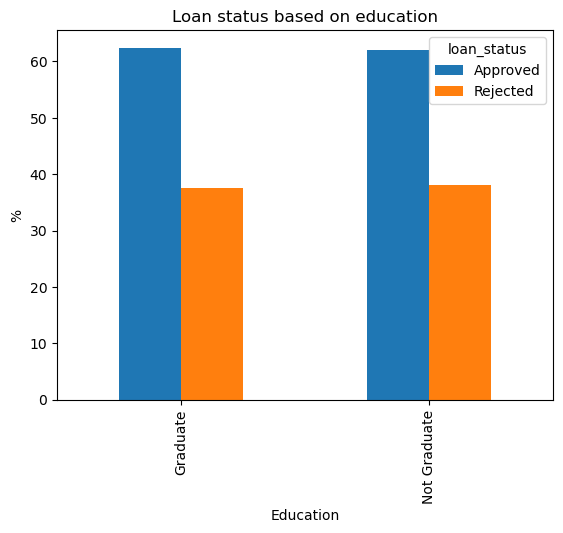

In [14]:
rate_edu = data.groupby('education')['loan_status'].value_counts(normalize=True).unstack() *100
rate_edu.plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("%")
plt.title("Loan status based on education")
plt.show()

From the above plot, we can say that the education doesn't really affect the loan status because both of them have similar approval and rejection rates

3.Dependents

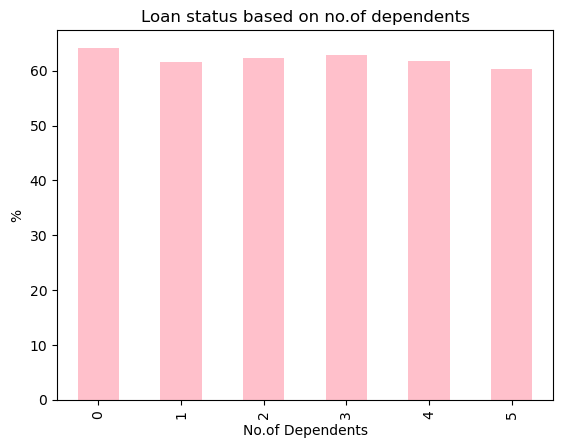

In [15]:
dep_app = data.groupby('no_of_dependents')['loan_status'].apply(lambda x: (x=="Approved").mean() *100)
dep_app.plot(kind="bar",color="pink")
plt.xlabel("No.of Dependents")
plt.ylabel("%")
plt.title("Loan status based on no.of dependents")
plt.show()

From the above plot, we can notice that no matter the number of dependents, the approval rate is not really affected

C:\Users\G.Sreenivasulu\AppData\Local\Temp\ipykernel_9364\1464052214.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('term_bucket')['loan_status']


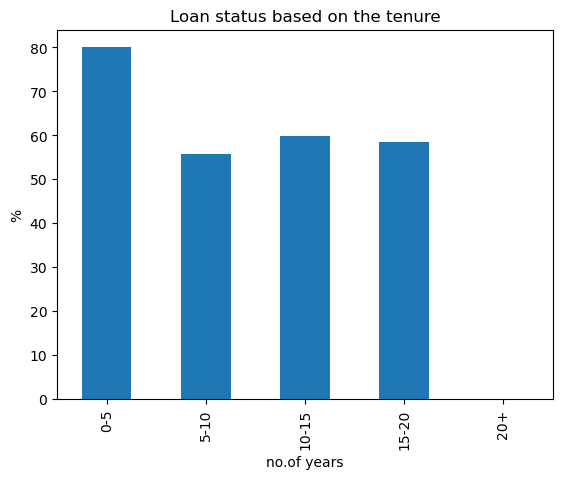

In [16]:
bins = [0, 5, 10, 15, 20, 30]
labels = ['0-5', '5-10', '10-15', '15-20', '20+']
#creating the loan terms into buckets
data['term_bucket'] = pd.cut(data['loan_term'], bins=bins, labels=labels)
#grouping based on the bins and considering approval percentage
term_approval = (
    data.groupby('term_bucket')['loan_status']
    .apply(lambda x: (x == "Approved").mean() * 100)
)

term_approval.plot(kind="bar")
plt.xlabel("no.of years")
plt.ylabel("%")
plt.title("Loan status based on the tenure")
plt.show()

The above bar chart shows that loans with less repayment period[0-5] are mostly approved [nearly 80%]

In [17]:
data.to_csv(r"C:\Users\G.Sreenivasulu\ABHI\loan_approval_project\dataset\03_EDA_dataset.csv")